# Получение данных

1.   Для получения данных обратимся к [StackOverflow Query](https://data.stackexchange.com/stackoverflow/query/new)
2. На сайте есть ограничения на возвращаемое число строк, а именно 50 000. Для того чтобы получить достаточно полные данные для анализа, будем пользоваться следующей эвристикой: Разделим полгода на два периода - '2021-09-16' - '2021-12-31' и '2021-12-31' - '2022-03-16'. Для каждого из этих периодов возьмем 50 000 самый посещаемых постов (те, у которых значение ViewCount является наибольшим) 

Действуем из предположения "используются наиболее часто за последние 6 месяцев" значит также нужны для поиска больше всего, а за это как раз отвечает число просмотров.

3.   Для всего перечисленного выше выполняем два запроса:

> ```
SELECT id, ViewCount, title, CreationDate, tags, body from Posts
WHERE CreationDate >= '2021-09-16'AND CreationDate < '2021-12-31'
ORDER BY ViewCount DESC;
```

> ```
SELECT id, ViewCount, title, CreationDate, tags, body from Posts
WHERE CreationDate >= '2021-12-31'AND CreationDate < '2022-03-16'
ORDER BY ViewCount DESC;
```


4. Смотреть на данные будем с помощью Pandas. Объединим с помощью merged два полученных csv файла. 





In [11]:
import pandas as pd

first_part = pd.read_csv('resources/1.csv')
second_part = pd.read_csv('resources/2.csv')
posts = pd.merge(first_part, second_part, on=['id', 'ViewCount', 'title', 'CreationDate', 'tags', 'body'], how='outer')


5. Посмотрим на самые популярные теги, для этого выполним следующий запрос


> `SELECT id, TagName, Count FROM Tags
ORDER BY Count DESC;`


In [12]:
tags = pd.read_csv('resources/tags.csv')

6. Как итог: `posts` - 100 000 самых просматриваемых постов за последние полгода, `tags` - 50 000 самых популярных тегов

In [13]:
posts.head(10)

,id,ViewCount,title,CreationDate,tags,body
0,69692842,284266,"Error message ""error:0308010C:digital envelope...",2021-10-23 23:39:57,<node.js><reactjs><webpack><webstorm>,<p>I created the default IntelliJ IDEA React p...
1,69394632,86928,Webpack build failing with ERR_OSSL_EVP_UNSUPP...,2021-09-30 15:07:50,<webpack>,<p>I'm having an issue with a Webpack build pr...
2,69665222,71578,"Node.js 17.0.1 Gatsby error - ""digital envelop...",2021-10-21 16:00:47,<node.js><gatsby>,"<p>I am building a <a href=""https://www.gatsby..."
3,69832748,69792,"Error ""Error: A <Route> is only ever to be use...",2021-11-03 23:06:48,<javascript><node.js><reactjs><frameworks><rea...,<p>I am trying to use routing for the first ti...
4,70358643,69527,"""You are running create-react-app 4.0.3 which ...",2021-12-15 04:58:02,<javascript><reactjs><npm-install><yarnpkg><npx>,<p>I got an error while creating a React appli...
5,69864165,68786,Error: [PrivateRoute] is not a <Route> compone...,2021-11-06 12:55:13,<javascript><reactjs><react-router-dom>,<p>I'm using React Router v6 and am creating p...
6,70315727,65115,Where to put formatMsgNoLookups in the Log4j X...,2021-12-11 13:52:18,<java><log4j2>,<p>I configure my Log4j with an XML file. Wher...
7,69868956,54371,How to redirect in React Router v6?,2021-11-07 00:34:29,<javascript><reactjs><react-router><react-rout...,<p>I am trying to upgrade to React Router v6 (...
8,69875125,51297,find_element_by_* commands are deprecated in s...,2021-11-07 17:53:49,<python><selenium><selenium-webdriver><webdriv...,<p>When starting the function</p>\n<pre><code>...
9,70281346,50911,Node.js Sass version 7.0.0 is incompatible wit...,2021-12-08 20:29:31,<node.js><reactjs><sass>,<p>I'm using Node.js 16.13.1 and created a Rea...


In [14]:
tags.head(10)

,id,TagName,Count
0,3,javascript,2346337
1,16,python,1906536
2,17,java,1832188
3,9,c#,1526636
4,5,php,1430443
5,1386,android,1367331
6,2,html,1117788
7,820,jquery,1024027
8,10,c++,757232
9,4,css,751267


# Анализ полученных данных
1. Заметим, что далеко не все теги являются технологиями, поэтому нам нужно убрать некоторые из них. Также уберем теги, которые являются простыми буквами, так как может быть неправильный подсчет из-за их использования в тексте. 

Отметим, что это может давать какую-то погрешность на самые популярные технологии, так как в данном случае некотрые из тегов-букв являются технологиями.

In [15]:
incorrect_tags = set(['class', 'file', 'text','message', 'request', 'get', 'local', 'default',
                  'button', 'pre', 'this', 'com', 'import', 'return', 'using', 'string',
                  'project', 'path', 'src', 'lib', 'image', 'function', 'version', 'public',
                  'any', 'self', 'main', 'set', 'int', 'var', 'line', 'object', 'module', 'packages',
                  'add', 'key', 'info', 'time', 'package', 'client', 'output', 'list', 'let', 'void',
                  'input', 'out', 'where', 'response', 'was', 'private', 'command', 'find', 'model',
                  'include', 'view', 'state', 'title', 'size', 'call', 'n', 'e', 'd', 'c', 's', 'm', 'alt', 'r',
                  'b', 'date', 'status', 'width', 'std', 'base', 'select', 'enter', 'each', 'post', 'options',
                  'label', 'token', 'map', 'bin', 'exception', 'export', 'task', 'next', 'gt', 
                  'nofollow', 'stack', 'href', 'png', 'build', 'https', 'http'])

2. Будем проходиться по основному тексу каждого из постов и сравнивать с получившимися тегами. (То есть смотрим на слова в тексе, которые являются тегами)

3. Считаем, количество раз, когда слово встретилось в текстах

In [16]:
from nltk.tokenize import RegexpTokenizer

# Записываем в set все названия тегов
tags_set = set(tags['TagName'])

# Разбиваем текст на слова
tokenizer = RegexpTokenizer(r'\w+')

# Словарь в котором считаем встретившиеся слова
vocab = {}

for post in posts.body:                   # Идем по тексту постов
    for word in tokenizer.tokenize(post): # Делимся на слова
        word = word.lower()               # Для сравнения приводим слова к общему регистру
        if word in tags_set:              # Если встретили слово, которое является тегом
          if word in incorrect_tags:      # Если встретили тег, который не является технологией -- пропускаем
            continue
          if word not in vocab:           # Если до этого не встречали, создаем новое 
            vocab[word] = 0
        
          vocab[word] +=1                 # Считаем количество раз, когда слово встретилось в тексте

4. Отсортируем словарь по убыванию частоты слов

In [17]:
vocab = sorted(vocab.items(), key = lambda item : item[1], reverse=True)
words = pd.DataFrame(vocab)
words = words.rename(columns={0:'word', 1:'freq'})

# Визуализация получившихся данных
1. Посмотрим на список 30 самых популярных технологий, а так же количетсво их использований

In [18]:
words.head(50)

,word,freq
0,java,107823
1,rel,57728
2,imgur,45504
3,android,44947
4,lang,37149
5,api,36313
6,server,34887
7,json,34255
8,core,33201
9,python,28369


2. Построим bar-диаграмму, на меньшее число данных чем мы смотрели выше, для наглядности

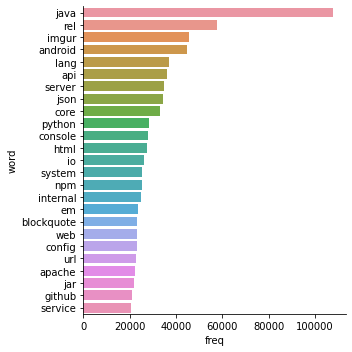

In [19]:
import seaborn as sns 

sns.catplot(x = 'freq',  y='word', data=words[:25], kind='bar')